In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from pathlib import Path

folder_list = []
train_dir = Path('train')

for folder in train_dir.iterdir():
    folder_list.append(folder)
folder_list


dfs = []
for folder in folder_list:
    if folder.is_dir():
        file_1 = folder/'annotations_0.csv'
        file_2 = folder/'annotations_1.csv'
        if file_1.exists():
            print(file_1)
            df = pd.read_csv(file_1)
            dfs.append(df)
        if file_2.exists():
            print(file_2)
            df = pd.read_csv(file_2)
            dfs.append(df)

df_co = pd.concat(dfs, ignore_index=True)
df_co.to_csv('combined_annotations.csv', index=False)

train\00001\annotations_0.csv
train\00001\annotations_1.csv
train\00002\annotations_0.csv
train\00002\annotations_1.csv
train\00003\annotations_0.csv
train\00004\annotations_0.csv
train\00004\annotations_1.csv
train\00005\annotations_0.csv
train\00006\annotations_0.csv
train\00007\annotations_0.csv
train\00007\annotations_1.csv
train\00008\annotations_0.csv
train\00009\annotations_0.csv
train\00010\annotations_0.csv


Training set activity classes distrubution

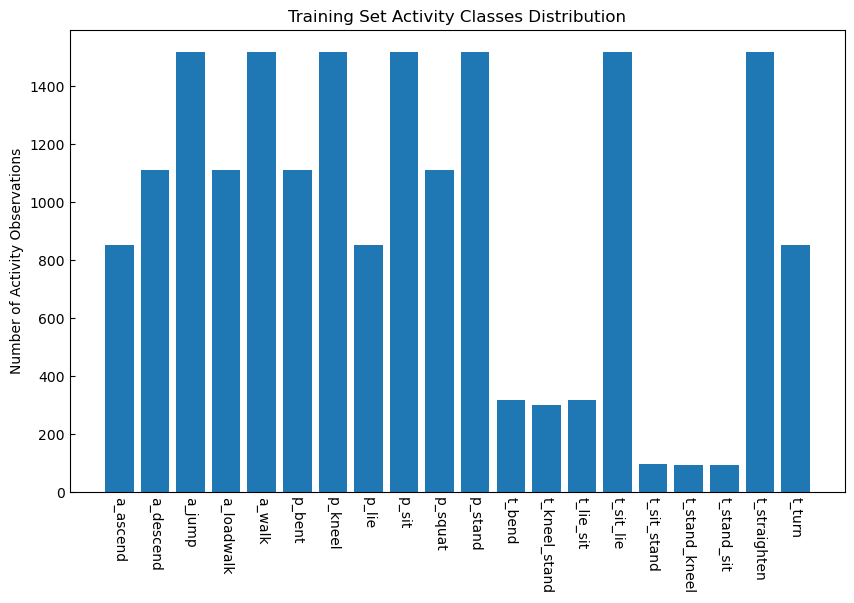

In [3]:

# 读取 CSV 文件
df = pd.read_csv('combined_annotations.csv')

# 根据 index 对数据进行排序
df_sorted = df.sort_values(by='index')

df_gph = pd.DataFrame()
df_gph['name'] = df_sorted['name'].unique()

# 计算排序后每个活动类型的频率
activity_counts_sorted = df_sorted['name'].value_counts()
# print(type(activity_counts_sorted))
df_gph['frequency'] = df['name'].map(activity_counts_sorted)


# 画出分布图
plt.figure(figsize=(10,6))
plt.bar(df_gph['name'], df_gph['frequency'])
plt.title('Training Set Activity Classes Distribution')
plt.ylabel('Number of Activity Observations')
plt.xticks(rotation=270, ha="center")  
plt.tick_params( axis='both',         
    which='both',        
    direction='in',
    bottom=False)
plt.show()